# Problem statement

# Data Understanding

#### Importing necessary libraries that are required for the the project

In [2]:
import gdown # download datasets from the google drive
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import pandas as pd # data analysis
import numpy as np # data manipulation, mathematical, statistical operations

# Data Ingestion

In [3]:
dataset_url = "https://drive.google.com/uc?id=1Evr7hvjrShs596b0TtwHyht0UicHBTly&export=download"
file_name = "train.csv"
gdown.download(dataset_url, file_name)

Downloading...
From: https://drive.google.com/uc?id=1Evr7hvjrShs596b0TtwHyht0UicHBTly&export=download
To: G:\Data science and ml metro\week_08\day_04\train.csv
100%|█████████████████████████████████████████████████████████████████████████████| 2.91M/2.91M [00:00<00:00, 3.76MB/s]


'train.csv'

<h4>Train data</h4>

In [4]:
missing_values = ["?", "", "n/a", "--"]
train_df = pd.read_csv(file_name, na_values=missing_values)
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


`["?", "", "n/a", "--"]` are missing values and if such values are in the datasets then they will be replaced by `NaN(np.nan)`- python's default marker for missing value which makes easier to handle the missing values in the datsets later.

In [5]:
dataset_url = "https://drive.google.com/uc?id=12V8MCSGXAZg2Il4m2Wurmd5-_P4c51GV&export=download"
file_name = "test.csv"
gdown.download(dataset_url, file_name)

Downloading...
From: https://drive.google.com/uc?id=12V8MCSGXAZg2Il4m2Wurmd5-_P4c51GV&export=download
To: G:\Data science and ml metro\week_08\day_04\test.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.82M/1.82M [00:00<00:00, 3.34MB/s]


'test.csv'

<h4>Test data</h4>

In [6]:
missing_values = ["?", "", "n/a", "--"]
test_df = pd.read_csv(file_name, na_values = missing_values)  
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


We used pandas read_csv() to load data from the csv file.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In the above code `info()` method is used to get all the information like number of rows, columns, datatypes(dtype), count of not-null value in the rows and memory ususge. We can see 1 float datatype, 8 int64 and 1 object datatype in the DataFrame.

# Exploratory Data Analysis and Data Cleaning

<h4>Missing Data</h4>
Missing data are the null values in the datasets.

In [8]:
train_df.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
88853,False,False,False,False,False,False,False,False,False,False
88854,False,False,False,False,False,False,False,False,False,False
88855,False,False,False,False,False,False,False,False,False,False
88856,False,False,False,False,False,False,False,False,False,False


`isnull()` method returns value in true and false if the data is null it returns `True` else `False`.

In [9]:
train_df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

`.isna().sum()` get the total missing in each column. In the above data, we can see 9000 missing values in the `Number_weeks_used` column of the datasets and rest of the column doesn't have missing values

In [10]:
train_df.isna().sum() / len(train_df) # gives the null value in the form of percentage

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.101285
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.000000
dtype: float64

From the above information approximately, `10%` of the data in the `Number_Weeks_Used` are missing.

In [11]:
train_df["Season"].nunique()

3

<h4>Missing values visualization</h4>

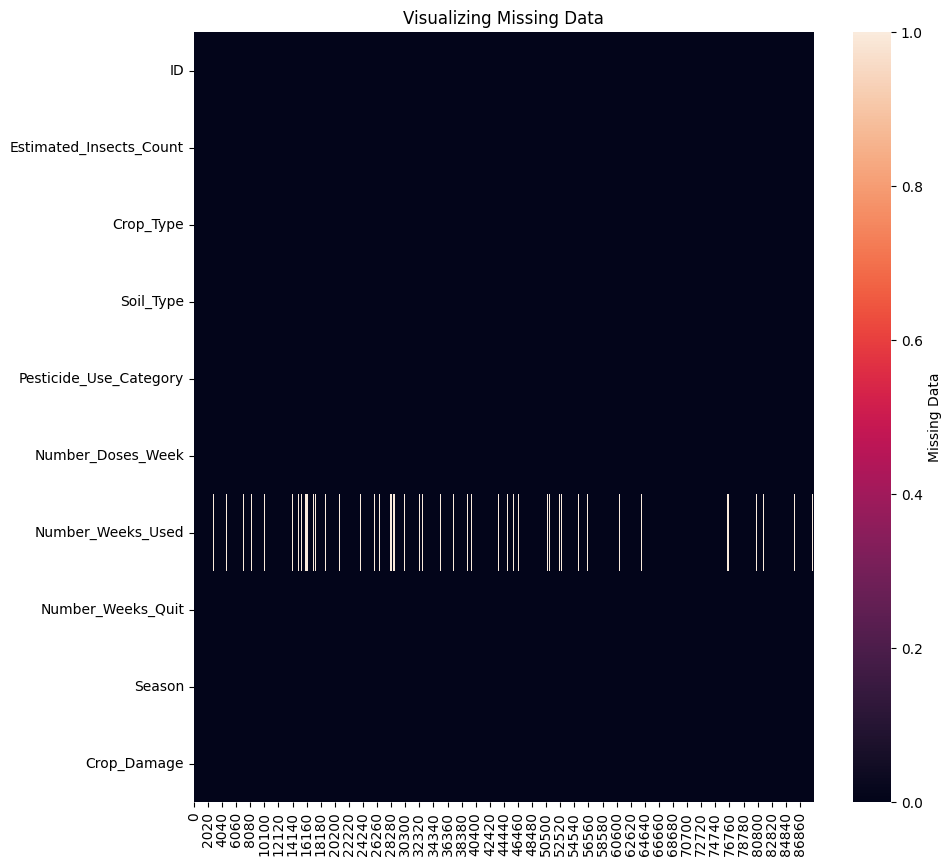

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.isna().transpose(), cbar_kws = {"label": "Missing Data"})
plt.title("Visualizing Missing Data")
plt.show()

In the above diagram, we can see the missing values in the `Number_Weeks_Used` column as white patterns.

<h4>Univariate Analysis Of categorical Variable</h4>

In [13]:
# function to return pieplot of the categorical data
def univariate_pieplot(data, column, explode):

    # value_counts of the column
    value = data[column].value_counts()
    plt.figure(figsize=(10, 8))
    # pie plot using the matplotlib library
    plt.pie(value.values, labels=value.index, autopct="%.2f%%", explode=explode)
    plt.title(f"Distribution of {column} in the dataset", y=1)
    plt.legend()
    plt.show()

#### Distribution of Crop type in the datasets

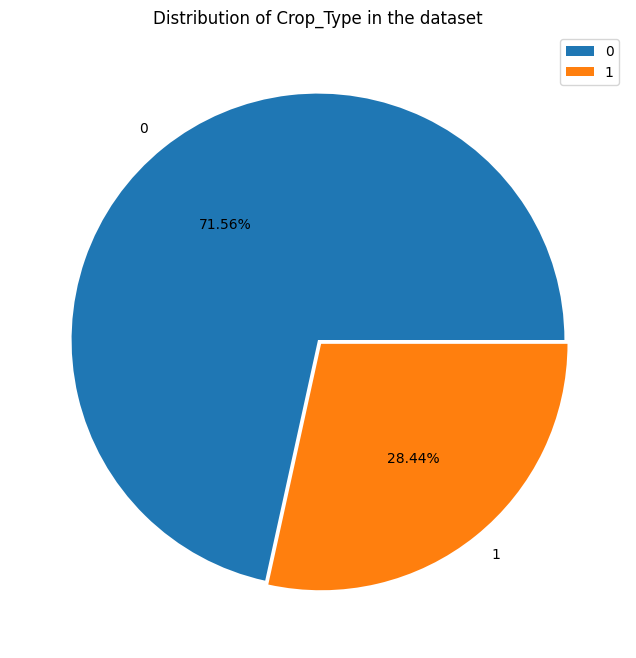

In [14]:
univariate_pieplot(data=train_df, column="Crop_Type", explode=[0, 0.02])

According to the above diagram,<br>
* `71.56%` of data in the datasets are crop type 0 category.
* `28.44%` of the data are of crop type 1 category.

#### Distribution of Soil type in the datasets

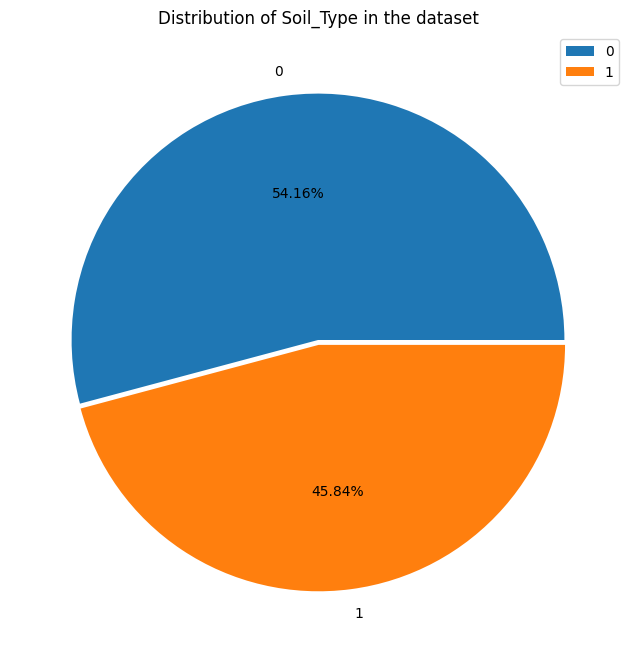

In [15]:
univariate_pieplot(data=train_df, column="Soil_Type", explode=[0, 0.02])

* `54.16%` of the data of soil type column in the datasets are in soil type 0 category.<br>
* `45.84%` data of soil type column are in soil type 1 category.

#### Distribution of Pesticide use category in the datasets

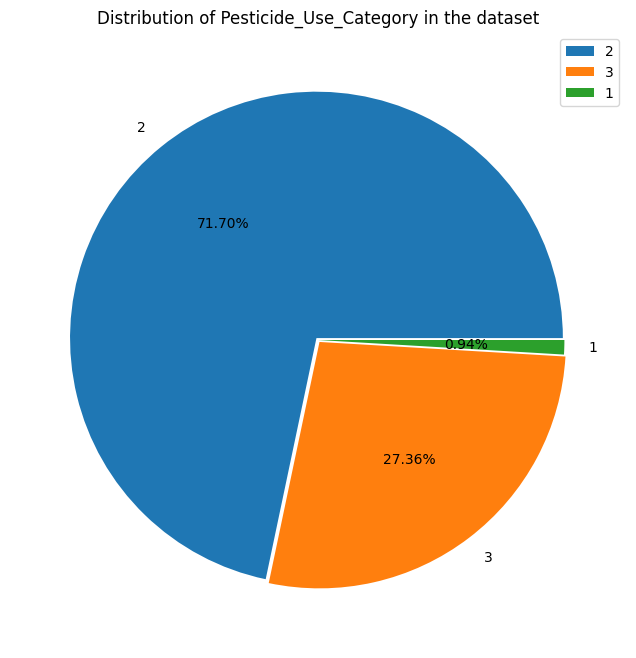

In [16]:
univariate_pieplot(data=train_df, column="Pesticide_Use_Category", explode=[0.01, 0.01, 0])

**According to above pieplot,**
* Highest percentage of data which is `71.70%` of the `Pesticide Use` column are type 2 category.
* `27.36%` of the data in the `pesticide use` column are of type 3 category.
* `0.94%` of the data in the `pesticide use` column are of type 1 category which is least among other 2 types.

#### Distribution of season 

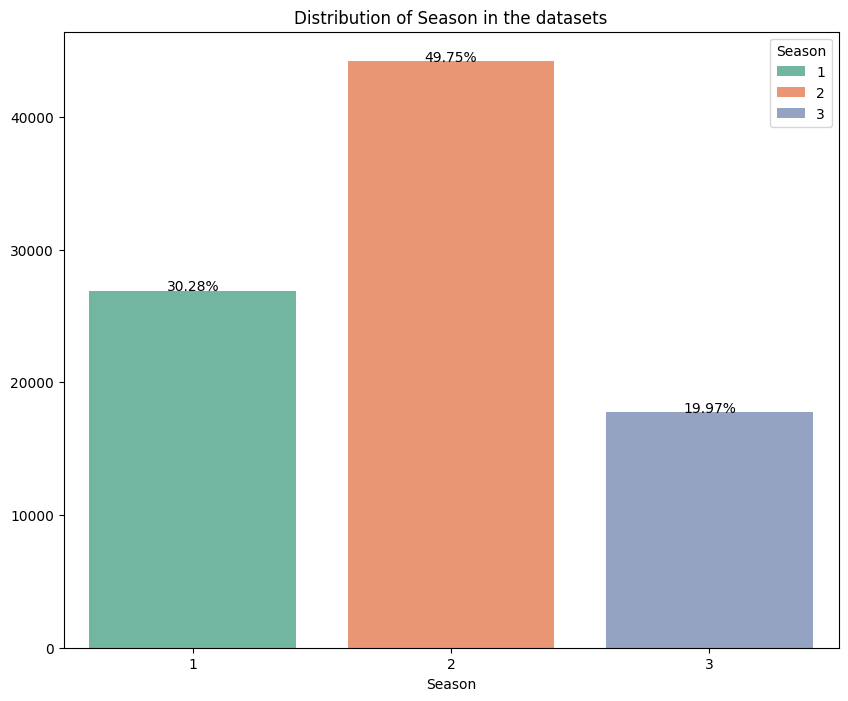

In [17]:
plt.figure(figsize=(10, 8))
data = train_df["Season"].value_counts()
ax = sns.barplot(x=data.index, y=data.values, hue=data.index, palette = "Set2")
plt.title("Distribution of Season in the datasets")
total = data.sum()
# Add percentage label for each plot
for plot in ax.patches:
    height = plot.get_height()
    if height <= 0.001:
        continue
    ax.annotate(
        # Percentage label text
        f"{height / total * 100:.2f}%",
        xy=(
            # Percentage label x co-ordinate
            plot.get_x() + plot.get_width() / 2.,
            # Percentage label y co-ordinate
            height,
        ),
        # Percentage label horizontal align
        ha="center",
    )
plt.show()

**According to above barplot**
* `30.28%` of the data in the `season` column are of type 1 category.
* `49.75%` data of the `season` column are of type 2 category which is nearly half of overall data in the column.
* `19.97%` data of the `season` column are of type 3 category which is lowest among other 2 category.

#### Target Variable (Crop Damage) Analysis

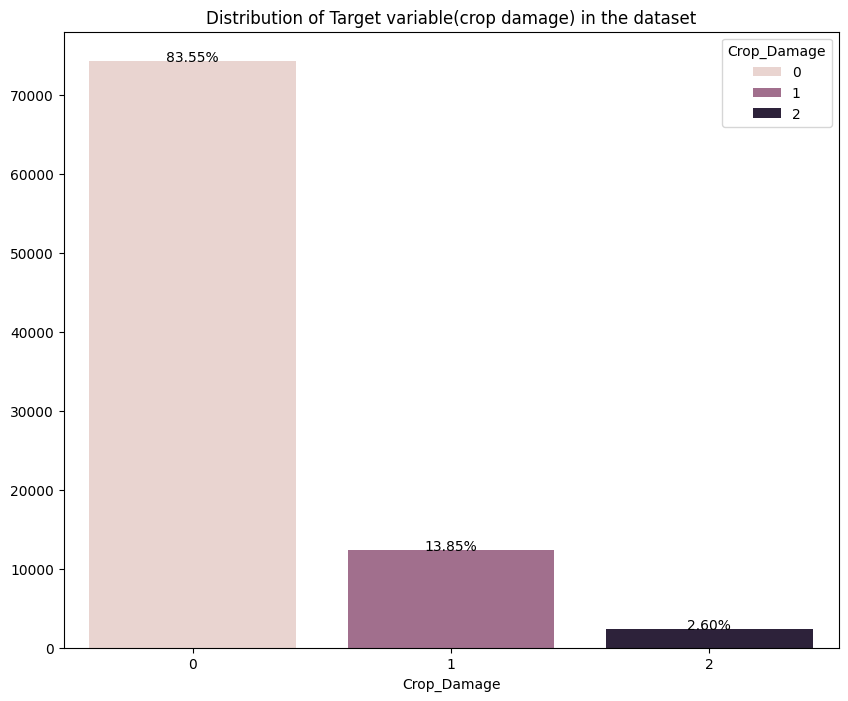

In [18]:
data = train_df["Crop_Damage"].value_counts()
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=data.index, hue=data.index, y=data.values)
for plot in ax.patches:
    height = plot.get_height()
    if height <= 0.001:
        continue
    ax.annotate(
        # Percentage label text
        f"{height / total * 100:.2f}%",
        xy=(
            # Percentage label x co-ordinate
            plot.get_x() + plot.get_width() / 2.,
            # Percentage label y co-ordinate
            height,
        ),
        # Percentage label horizontal align
        ha="center",
    )
plt.title("Distribution of Target variable(crop damage) in the dataset")
plt.show()

* According to the above data we can say that the target variable consists of imbalanced data.<br>
* Crop damage 0 consists of `83.55%` data in the overall target dataset.<br>
* Crop Damage 1 consists of `13.85%` data  and crop damage 2 consists of only `2.60%` of data.

<h4>Numerical Variables</h4>

In [19]:
numerical_features = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]
train_df[numerical_features].describe()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
count,88858.000000,88858.000000,79858.000000,88858.000000
mean,1399.012210,25.849952,28.623970,9.589986
std,849.048781,15.554428,12.391881,9.900631
min,150.000000,0.000000,0.000000,0.000000
25%,731.000000,15.000000,20.000000,0.000000
50%,1212.000000,20.000000,28.000000,7.000000
75%,1898.000000,40.000000,37.000000,16.000000
max,4097.000000,95.000000,67.000000,50.000000


#### Estimated Insects Count

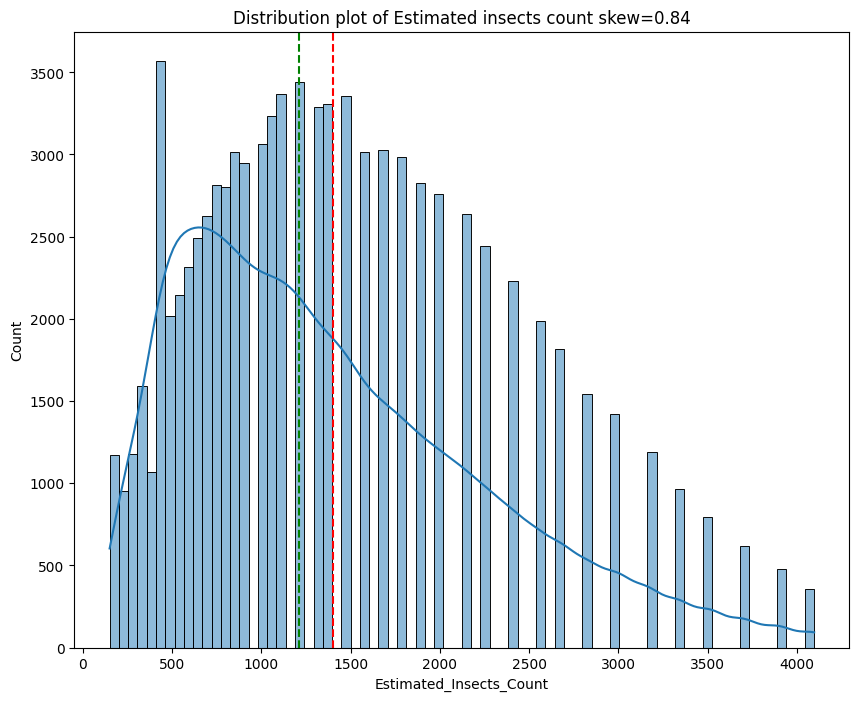

In [20]:
plt.figure(figsize=(10, 8))
# histogram plot of the data using seaborn
sns.histplot(data=train_df, x="Estimated_Insects_Count", kde=True)
plt.title(f"Distribution plot of Estimated insects count skew={round(train_df["Estimated_Insects_Count"].skew(),2)}")

# plotting mean in the histogram 
plt.axvline(train_df["Estimated_Insects_Count"].mean(), color="red", linestyle="dashed")

# plotting median in the histogram
plt.axvline(train_df["Estimated_Insects_Count"].median(), color="green", linestyle="dashed")
plt.show()

According to above diagram, 
* Data in the `estimated insects count` columns are right tailed it means it is right skewed.
* `mean` is greather than `median`.

#### Number_Doses_Week

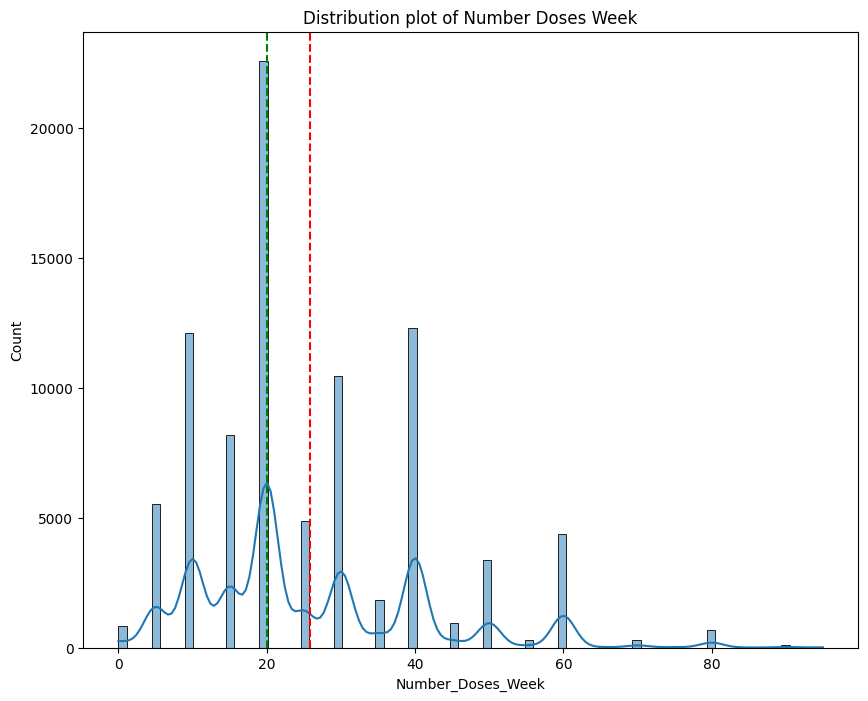

In [21]:
plt.figure(figsize=(10, 8))
sns.histplot(data=train_df, x="Number_Doses_Week", kde=True)
plt.title("Distribution plot of Number Doses Week")

plt.axvline(train_df["Number_Doses_Week"].mean(), color="red", linestyle="dashed")
plt.axvline(train_df["Number_Doses_Week"].median(), color="green", linestyle="dashed")

plt.show()

According to above diagram, 
* `Mean` is greather than `median` so the data are right skewed which we can also see in the diagram.

#### Number_Weeks_Used

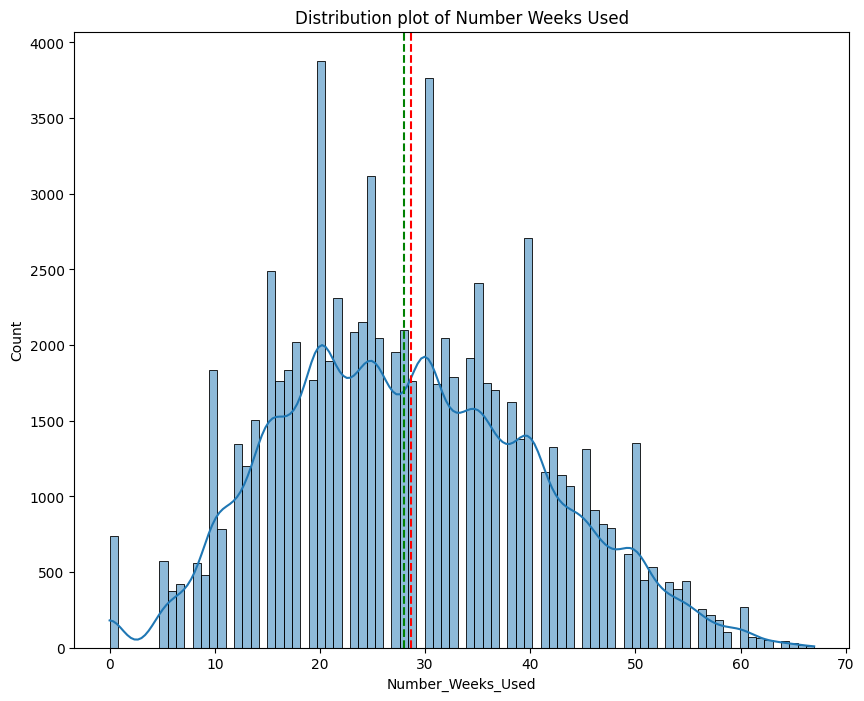

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(data=train_df, x="Number_Weeks_Used", kde=True)
plt.title("Distribution plot of Number Weeks Used")
plt.axvline(train_df["Number_Weeks_Used"].mean(), color="red", linestyle="dashed")
plt.axvline(train_df["Number_Weeks_Used"].median(), color="green", linestyle="dashed")

plt.show()

According to the above histogram,
* `mean` is greater than `median` in the `number_weeks_used` column.
* It means data are right skewed in the columns.

#### Number_Weeks_Quit

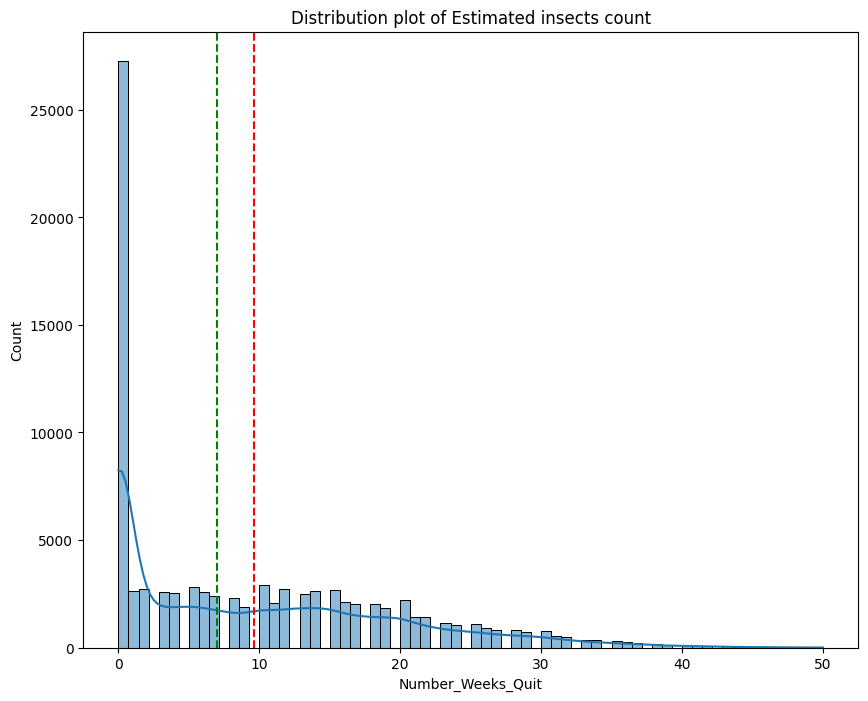

In [23]:
plt.figure(figsize=(10, 8))
sns.histplot(data=train_df, x="Number_Weeks_Quit", kde=True)
plt.title("Distribution plot of Estimated insects count")

plt.axvline(train_df["Number_Weeks_Quit"].mean(), color="red", linestyle="dashed")
plt.axvline(train_df["Number_Weeks_Quit"].median(), color="green", linestyle="dashed")

plt.show()

According to above histogram,
* `mean` is greater than `median` in the `number_weeks_quit` columns.
* Data are right skewed in the columns.

#### Checking skewness of the numerical data

In [24]:
# gives skew of all the numerical data
train_df[numerical_features].skew()

Estimated_Insects_Count    0.839146
Number_Doses_Week          0.962879
Number_Weeks_Used          0.244592
Number_Weeks_Quit          0.892773
dtype: float64

* According to above information every column in the numerical features are positively skewed which we can also see in the above diagram.
* skew of `estimated insects count` is `0.84`.
* skew of `number doses week` is `0.96`.
* skew of `number_weeks_used` is `0.245`.
* And skew of `number_weeks_quit` is `0.89`.

#### Bivariate Analysis

#### crop_type vs estimated_insects_count

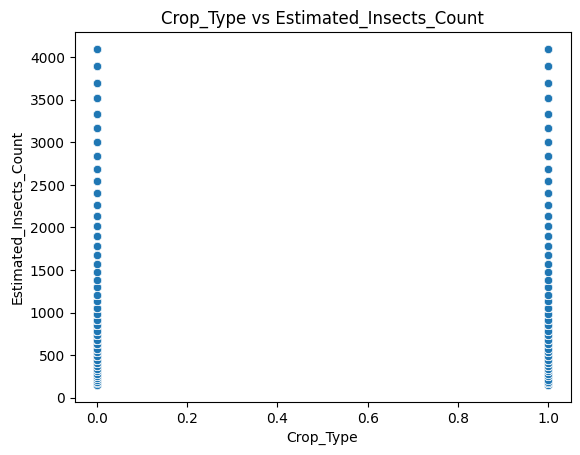

In [25]:
sns.scatterplot(data=train_df, x="Crop_Type", y="Estimated_Insects_Count")
plt.title("Crop_Type vs Estimated_Insects_Count")
plt.show()

#### pesticide use category vs estimated insects count

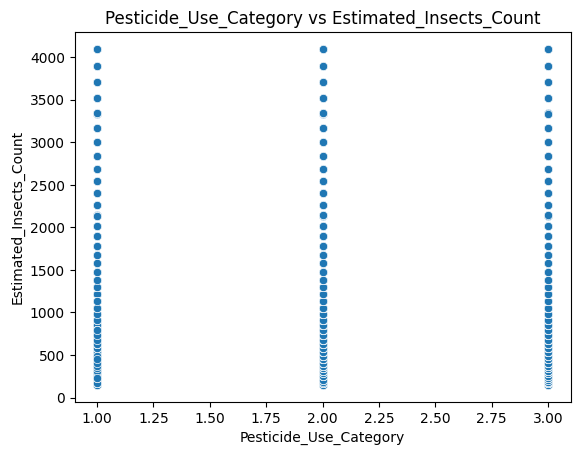

In [26]:
sns.scatterplot(data=train_df, x="Pesticide_Use_Category", y="Estimated_Insects_Count")
plt.title("Pesticide_Use_Category vs Estimated_Insects_Count")
plt.show()

#### soil type vs estimated_insects_count

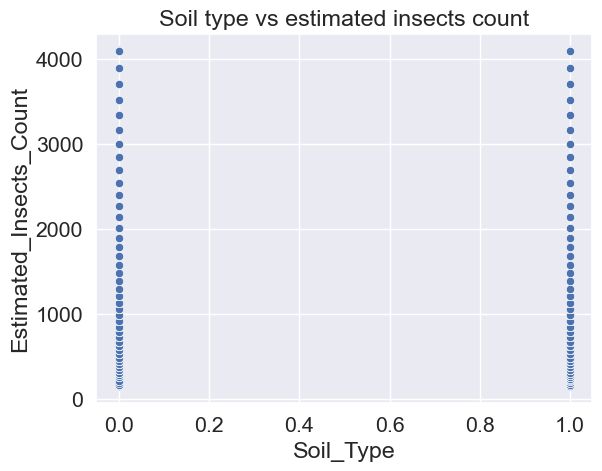

In [73]:
sns.scatterplot(data=train_df, x="Soil_Type", y="Estimated_Insects_Count")
plt.title("Soil type vs estimated insects count")
plt.show()

In [67]:
train_df.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1


In [27]:
def bivariate_barplot(data, xlabel, ylabel="Frequency", xlabel_rotation=0):
    # Set font size
    sns.set(font_scale=1.4)
    ax = data.groupby([xlabel, "Crop_Damage"]).size().unstack().plot.bar(
        stacked=True,
        # Set a categorical color palette
        color=sns.color_palette("Set2"),
        # Set a figure size
        figsize=(10, 10),
        # Rotate the x-axis labels for proper orientation
        rot=xlabel_rotation,
    )

    ax.set_title(f"Distribution of {xlabel} with respect to the Crop_Damage", y=1.02)
    ax.set_xlabel(xlabel, labelpad=14)
    ax.set_ylabel(ylabel, labelpad=14)

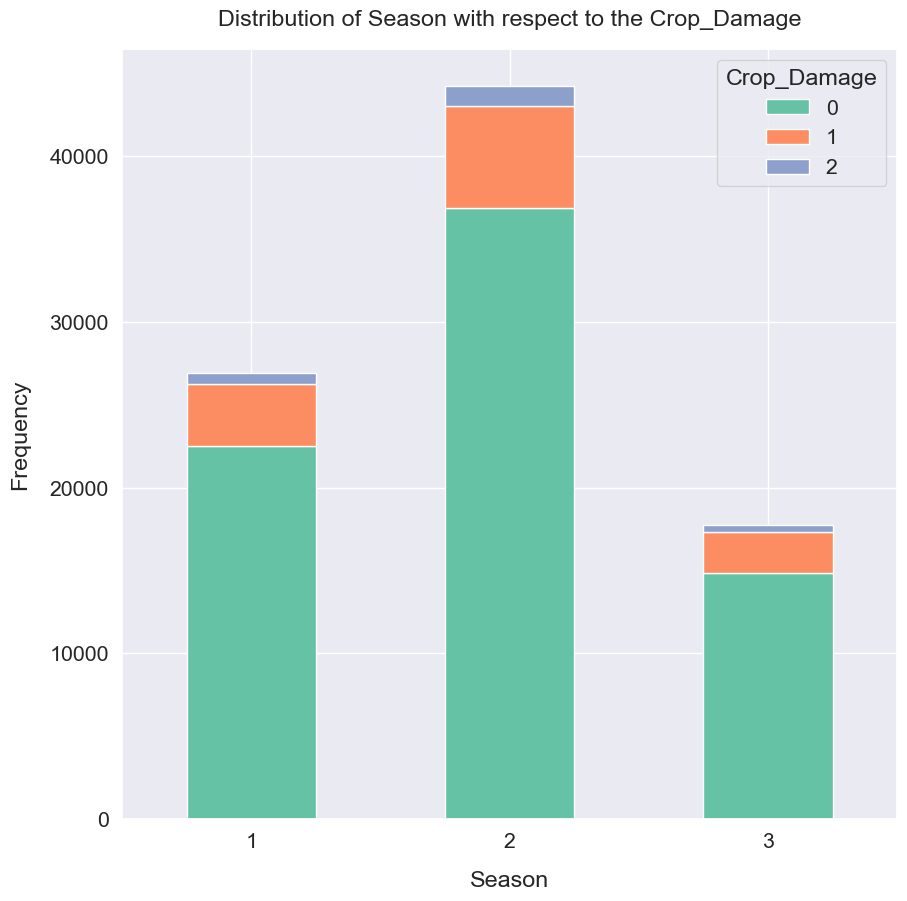

In [28]:
bivariate_barplot(data=train_df, xlabel="Season")

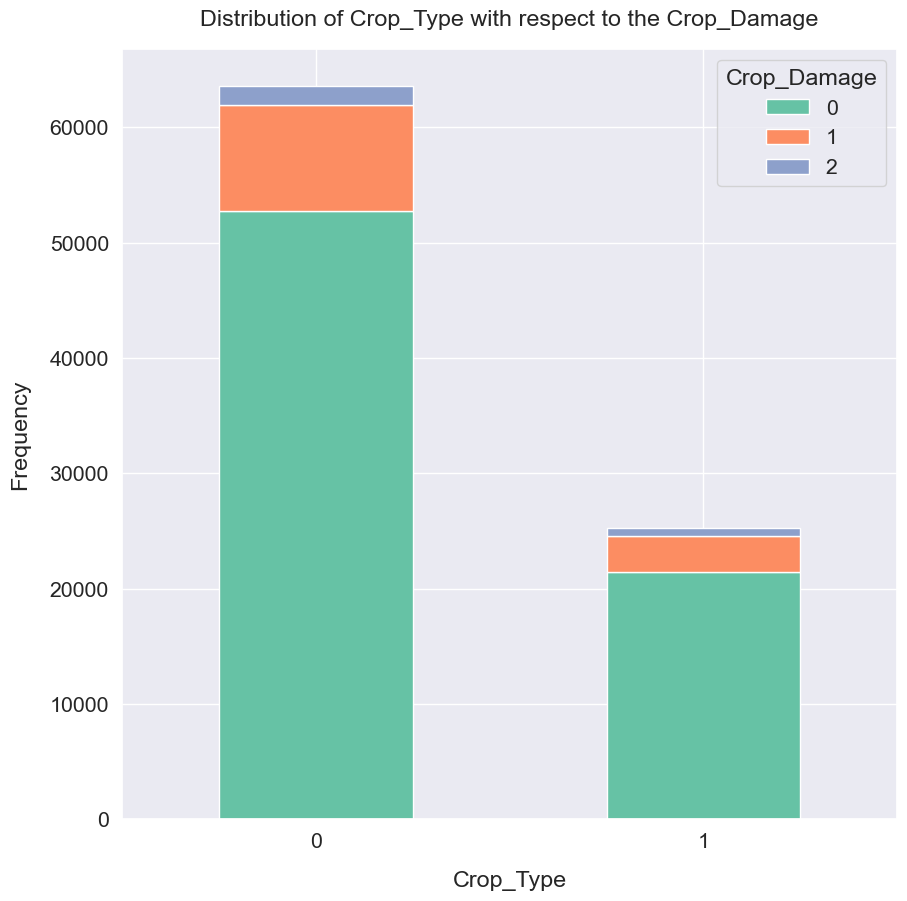

In [29]:
bivariate_barplot(data=train_df, xlabel="Crop_Type")

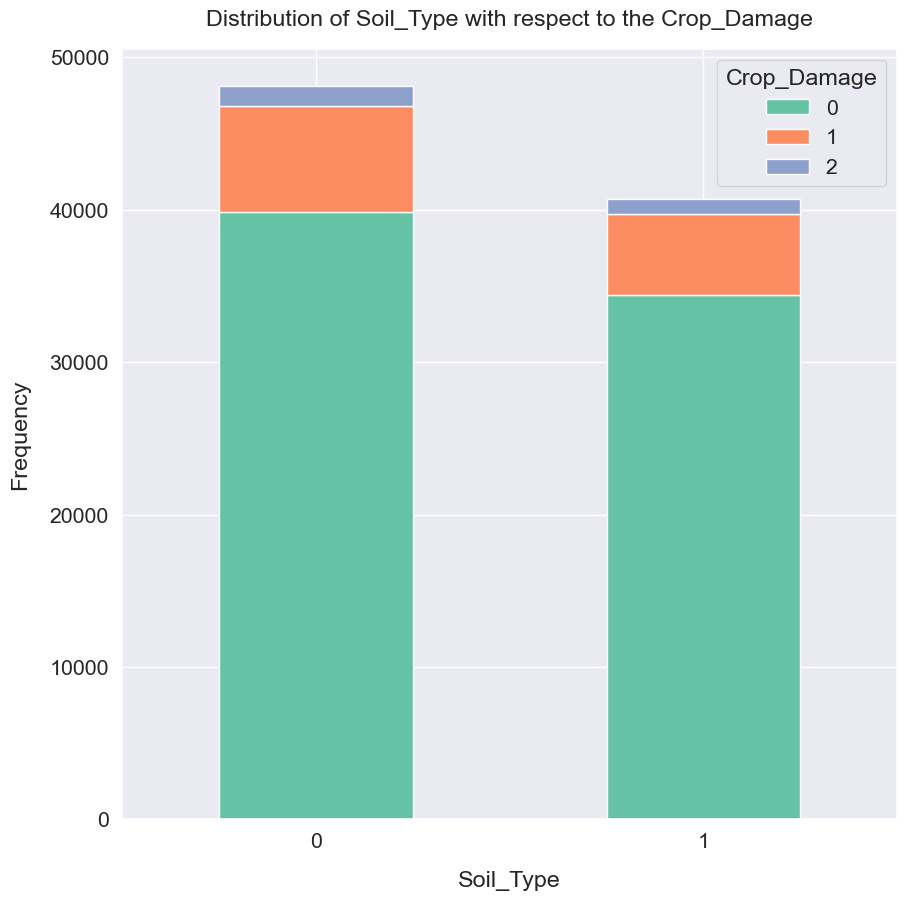

In [30]:
bivariate_barplot(data=train_df, xlabel="Soil_Type")

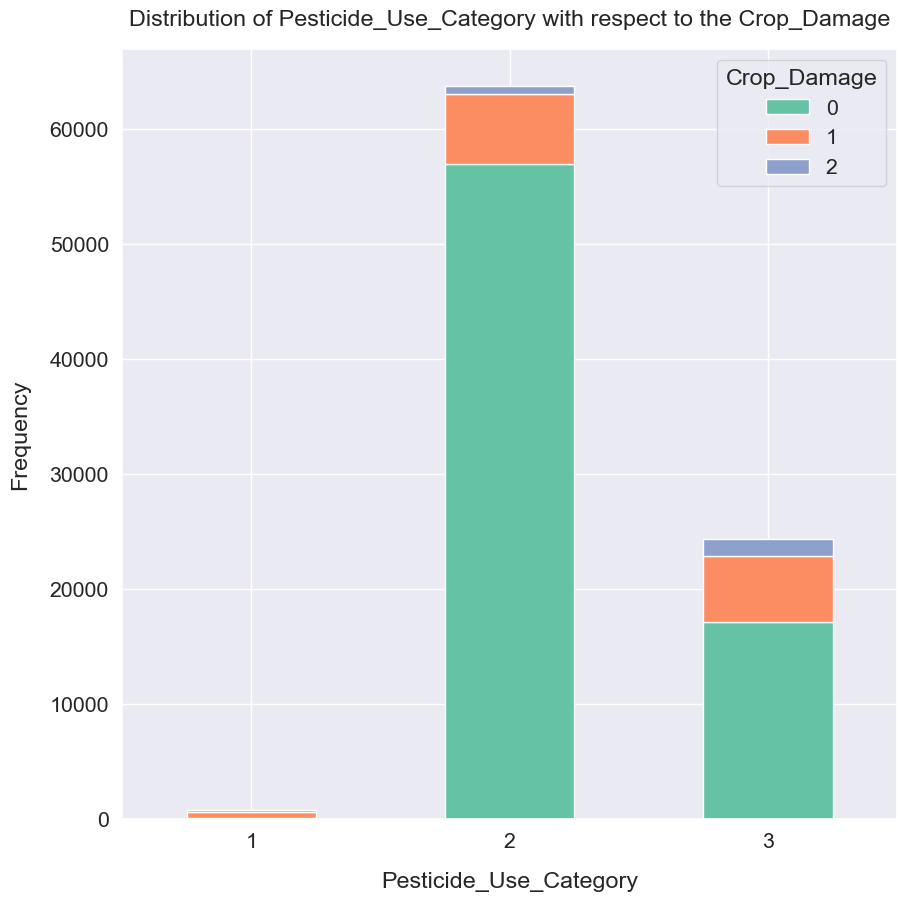

In [31]:
bivariate_barplot(data=train_df, xlabel="Pesticide_Use_Category")

In [32]:
def calculate_feature_impact_probability(data, feature, label="Crop_Damage"):
    feature_impact = data.groupby(feature)[label].agg(["sum", "size"])
    feature_impact_probability = feature_impact["sum"] / feature_impact["size"] * 100
    return feature_impact_probability


In [33]:
calculate_feature_impact_probability(data=train_df, feature="Crop_Type")

Crop_Type
0    19.528535
1    17.867743
dtype: float64

In [34]:
train_df.head(2)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1


#### Bivariate Analysis: Correlation Matrix and Scatter plots

In [35]:
train_df[numerical_features].corr()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
Estimated_Insects_Count,1.000000,-0.102461,0.434925,0.299279
Number_Doses_Week,-0.102461,1.000000,0.126426,-0.037131
Number_Weeks_Used,0.434925,0.126426,1.000000,-0.449007
Number_Weeks_Quit,0.299279,-0.037131,-0.449007,1.000000


In [36]:
target_variable = "Crop_Damage"
# target_variable

In [37]:
train_df[numerical_features + [target_variable]].corr()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage
Estimated_Insects_Count,1.000000,-0.102461,0.434925,0.299279,0.202888
Number_Doses_Week,-0.102461,1.000000,0.126426,-0.037131,-0.030874
Number_Weeks_Used,0.434925,0.126426,1.000000,-0.449007,0.232192
Number_Weeks_Quit,0.299279,-0.037131,-0.449007,1.000000,-0.133117
Crop_Damage,0.202888,-0.030874,0.232192,-0.133117,1.000000


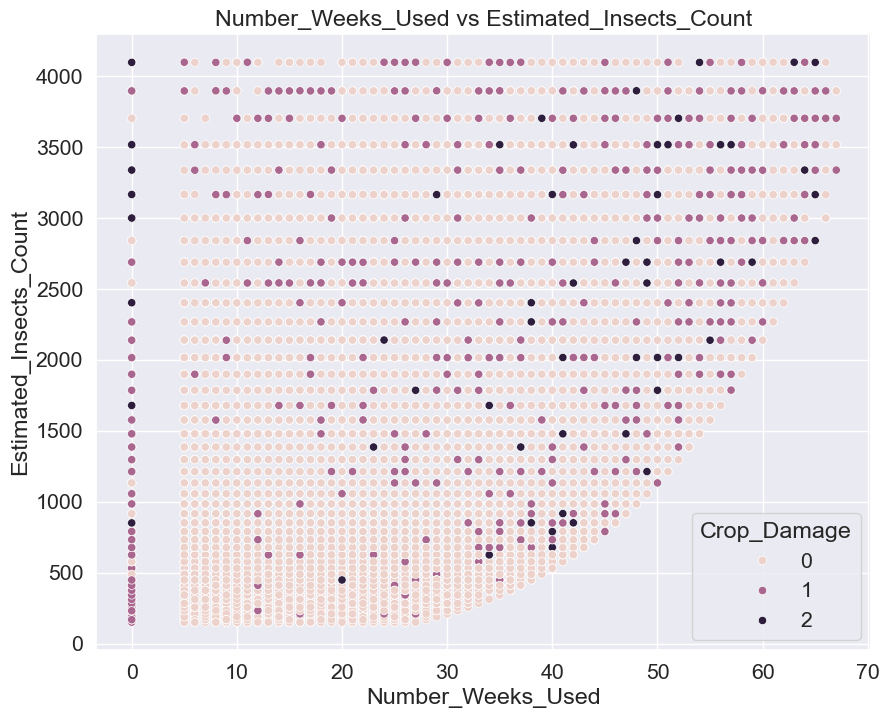

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df, x="Number_Weeks_Used", y="Estimated_Insects_Count", hue="Crop_Damage")
plt.title("Number_Weeks_Used vs Estimated_Insects_Count")
plt.show()

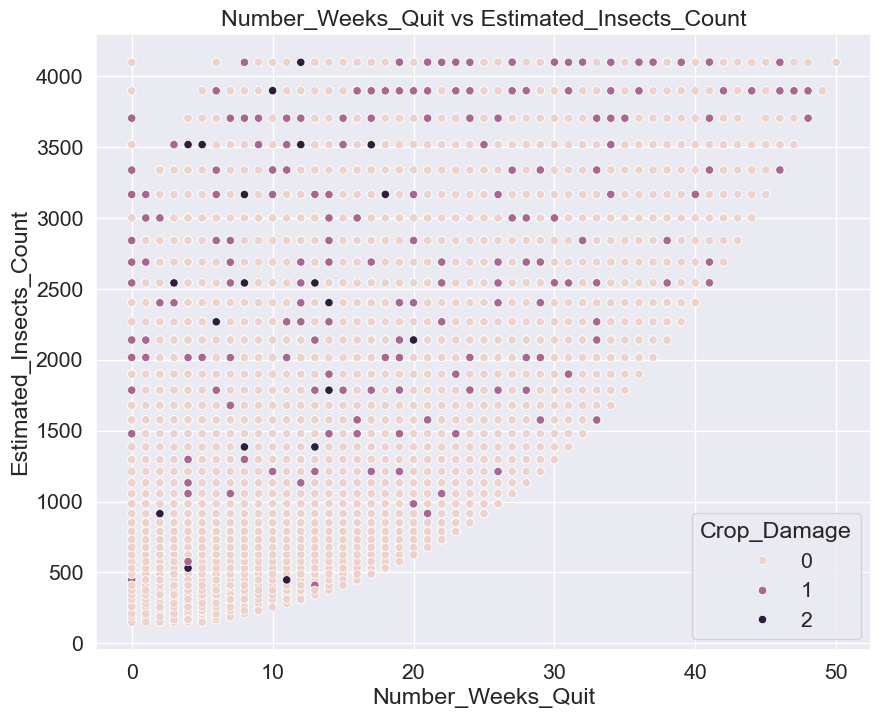

In [39]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df, x="Number_Weeks_Quit", y="Estimated_Insects_Count", hue="Crop_Damage")
plt.title("Number_Weeks_Quit vs Estimated_Insects_Count")
plt.show()

# Data Imputation

In [40]:
features = train_df.drop(columns=["ID", "Crop_Damage"])

In [41]:
from sklearn.impute import KNNImputer


imputter = KNNImputer(n_neighbors=30)
imputted_data = imputter.fit_transform(features)
# imputted_data

In [42]:
features = pd.DataFrame(data=imputted_data, columns=features.columns)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  float64
 1   Crop_Type                88858 non-null  float64
 2   Soil_Type                88858 non-null  float64
 3   Pesticide_Use_Category   88858 non-null  float64
 4   Number_Doses_Week        88858 non-null  float64
 5   Number_Weeks_Used        88858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  float64
 7   Season                   88858 non-null  float64
dtypes: float64(8)
memory usage: 5.4 MB


In [43]:
features.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

#### Outlier Detection

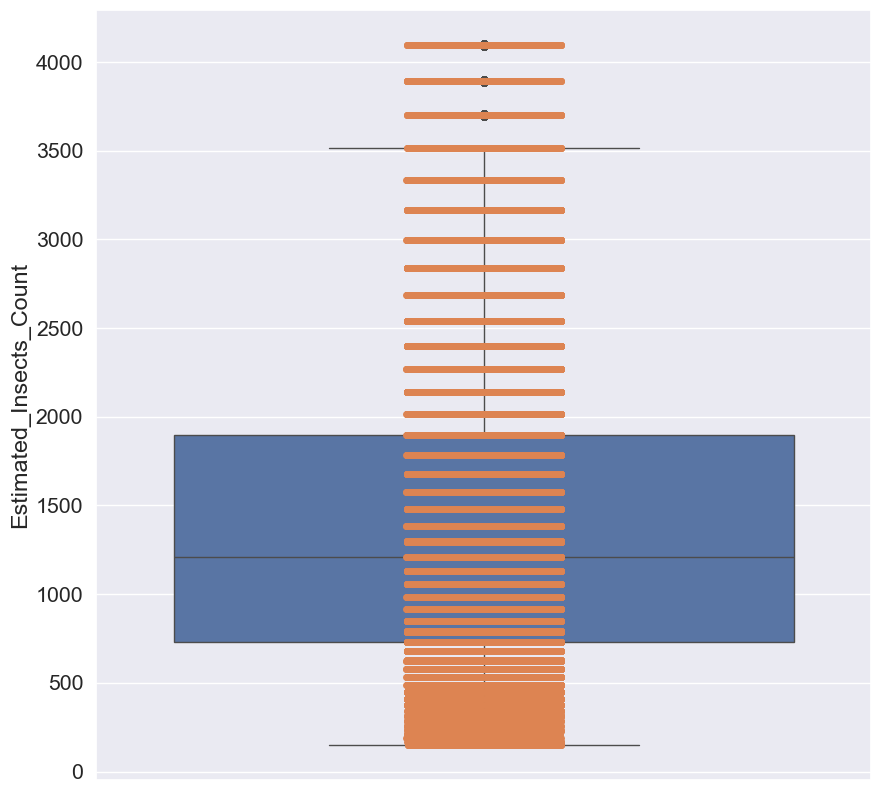

In [44]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.Estimated_Insects_Count)
sns.stripplot(data=features.Estimated_Insects_Count)
plt.show()

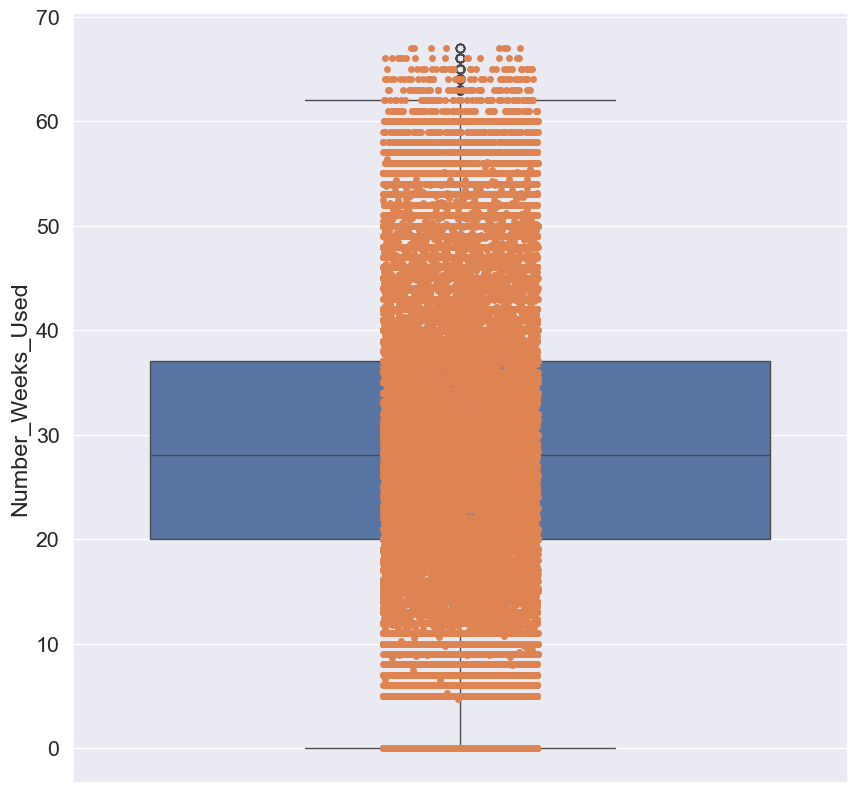

In [45]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.Number_Weeks_Used)
sns.stripplot(data=features.Number_Weeks_Used)
plt.show()

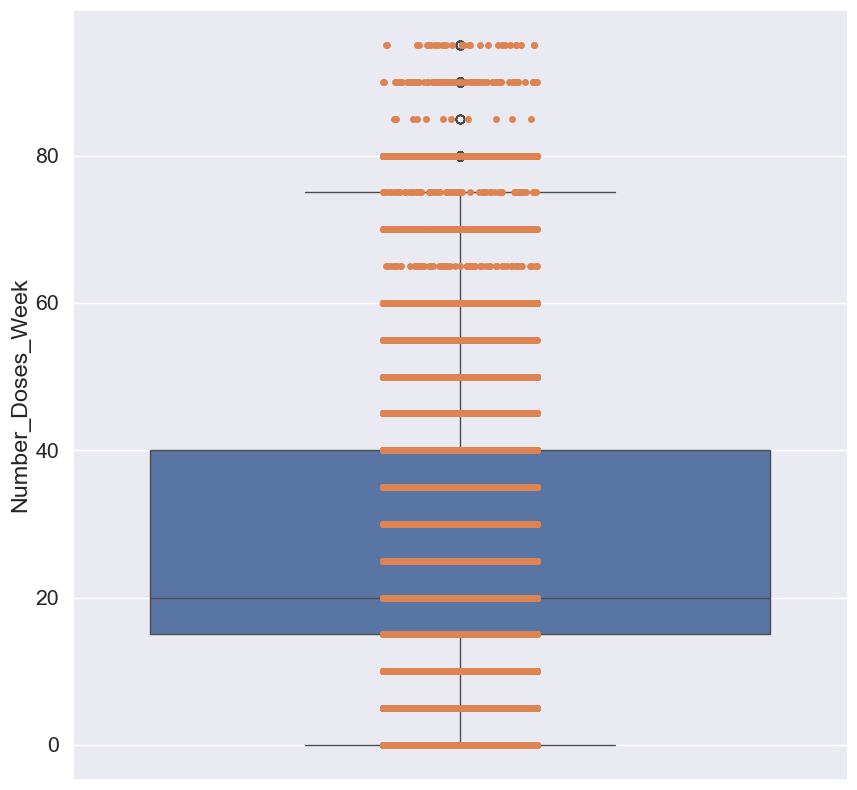

In [46]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.Number_Doses_Week)
sns.stripplot(data=features.Number_Doses_Week)
plt.show()

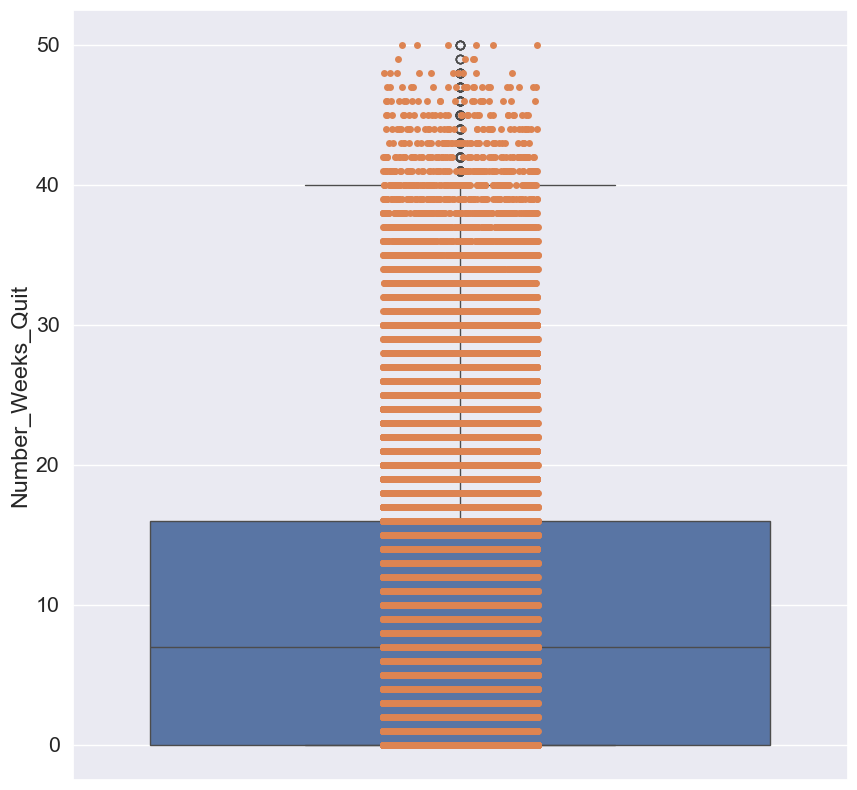

In [47]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=features.Number_Weeks_Quit)
sns.stripplot(data=features.Number_Weeks_Quit)
plt.show()

#### Feature Selection

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = features
y = train_df["Crop_Damage"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [51]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [52]:
y_train_counts = y_train.value_counts()
y_train_counts / y_train_counts.sum() * 100

Crop_Damage
0    83.631095
1    13.746729
2     2.622176
Name: count, dtype: float64

#### Feature Normalization

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale = StandardScaler()

X_train[numerical_features] = scale.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scale.transform(X_test[numerical_features])

#### Model Training Using Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [56]:
clf.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [57]:
y_pred = clf.predict(X_test)

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14633,   155,     0],
       [ 2403,   132,     0],
       [  429,    20,     0]], dtype=int64)

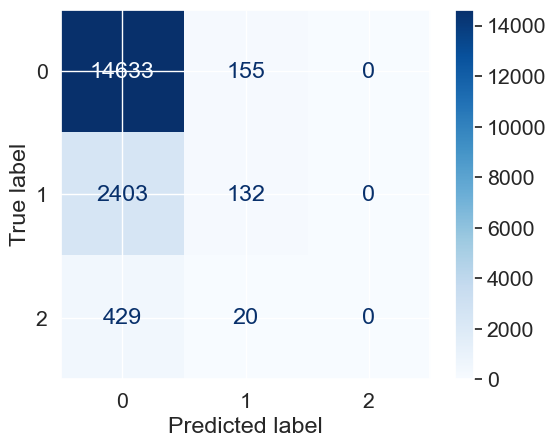

In [59]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=clf.classes_, cmap=plt.cm.Blues)

In [60]:
from sklearn.metrics import accuracy_score, f1_score

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score is {accuracy * 100:.2f}%")

Accuracy score is 83.08%


In [62]:
f1_score = f1_score(y_test, y_pred, average=None)
f1_score

array([0.90738846, 0.09289233, 0.        ])

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0.0))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     14788
           1       0.43      0.05      0.09      2535
           2       0.00      0.00      0.00       449

    accuracy                           0.83     17772
   macro avg       0.42      0.35      0.33     17772
weighted avg       0.76      0.83      0.77     17772



In [64]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
